# Problema 1 – Café quente


## 1) Fuzzifique T = 65 °C: calcule μ em cada conjunto

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def trimf(x, a, b, c):
    x = np.asarray(x, dtype=float)
    left  = (x - a) / (b - a + 1e-12)
    right = (c - x) / (c - b + 1e-12)
    return np.maximum(0.0, np.minimum(left, right))

# Conjuntos: Frio=tri(0,0,40), Morno=tri(30,50,70), Quente=tri(60,100,100)
T = np.linspace(0, 100, 1001)
mu_frio   = trimf(T, 0, 0, 40)
mu_morno  = trimf(T, 30, 50, 70)
mu_quente = trimf(T, 60, 100, 100)

T_in = 65.0
mu_F = float(np.interp(T_in, T, mu_frio))
mu_M = float(np.interp(T_in, T, mu_morno))
mu_Q = float(np.interp(T_in, T, mu_quente))

print(f"μ_Frio({T_in})   = {mu_F:.4f}")
print(f"μ_Morno({T_in})  = {mu_M:.4f}")
print(f"μ_Quente({T_in}) = {mu_Q:.4f}")


μ_Frio(65.0)   = 0.0000
μ_Morno(65.0)  = 0.2500
μ_Quente(65.0) = 0.1250


## 2) Regra: SE café é Morno ENTÃO “aquecer” = Alto — Qual o nível de disparo?

In [3]:

T = np.linspace(0, 100, 1001)
mu_morno  = trimf(T, 30, 50, 70)
T_in = 65.0
mu_M = float(np.interp(T_in, T, mu_morno))

firing = mu_M
print(f"Nível de disparo da regra (Morno -> Aquecer Alto) = {firing:.4f}")


Nível de disparo da regra (Morno -> Aquecer Alto) = 0.2500


## 3) Esboço das funções de pertinência

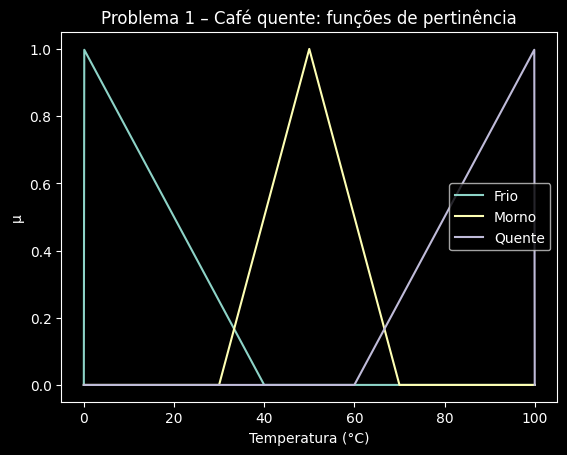

In [4]:
plt.figure()
plt.plot(T, mu_frio,  label="Frio")
plt.plot(T, mu_morno, label="Morno")
plt.plot(T, mu_quente,label="Quente")
plt.title("Problema 1 – Café quente: funções de pertinência")
plt.xlabel("Temperatura (°C)")
plt.ylabel("μ")
plt.legend()
plt.show()


# Problema 2 – Ar-condicionado


## 1) Para T = 28 °C, quais regras disparam e com quais graus?

In [5]:

T = np.linspace(0, 40, 801)
mu_frio  = trimf(T, 0, 0, 20)
mu_agrad = trimf(T, 15, 25, 35)
mu_quente= trimf(T, 30, 40, 40)

T_in = 28.0
mu_F = float(np.interp(T_in, T, mu_frio))
mu_A = float(np.interp(T_in, T, mu_agrad))
mu_Q = float(np.interp(T_in, T, mu_quente))

print(f"μ_Frio({T_in}) = {mu_F:.4f}")
print(f"μ_Agradável({T_in}) = {mu_A:.4f}")
print(f"μ_Quente({T_in}) = {mu_Q:.4f}")

if mu_F > 0:
    print(f"Regra: SE Temp é Frio → Ventilador é Baixo (grau = {mu_F:.4f})")
if mu_A > 0:
    print(f"Regra: SE Temp é Agradável → Ventilador é Médio (grau = {mu_A:.4f})")
if mu_Q > 0:
    print(f"Regra: SE Temp é Quente → Ventilador é Alto (grau = {mu_Q:.4f})")


μ_Frio(28.0) = 0.0000
μ_Agradável(28.0) = 0.7000
μ_Quente(28.0) = 0.0000
Regra: SE Temp é Agradável → Ventilador é Médio (grau = 0.7000)


## 2) Agregue os conjuntos de saída (Mamdani)

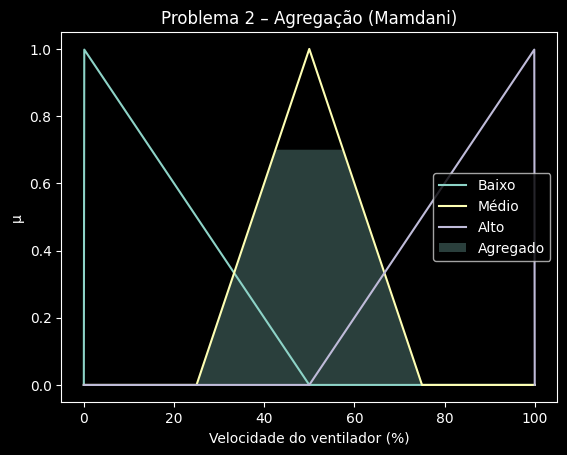

In [6]:

S = np.linspace(0, 100, 1001)
mu_baixo = trimf(S, 0, 0, 50)
mu_medio = trimf(S, 25, 50, 75)
mu_alto  = trimf(S, 50, 100, 100)

rule1 = np.minimum(mu_F, mu_baixo)
rule2 = np.minimum(mu_A, mu_medio)
rule3 = np.minimum(mu_Q, mu_alto)

agg = np.maximum.reduce([rule1, rule2, rule3])

plt.figure()
plt.plot(S, mu_baixo, label="Baixo")
plt.plot(S, mu_medio, label="Médio")
plt.plot(S, mu_alto,  label="Alto")
plt.fill_between(S, 0, agg, alpha=0.3, label="Agregado")
plt.title("Problema 2 – Agregação (Mamdani)")
plt.xlabel("Velocidade do ventilador (%)")
plt.ylabel("μ")
plt.legend()
plt.show()


## 3) Use o centróide para encontrar a saída nítida

In [13]:

def centroid(x, mu):
    x = np.asarray(x, dtype=float)
    mu = np.asarray(mu, dtype=float)
    num = np.trapz(x * mu, x)
    den = np.trapz(mu, x)
    return num / den if den>0 else float("nan")

y_out = centroid(S, agg)
print(f"Saída nítida (centróide) = {y_out:.2f}%")


Saída nítida (centróide) = 50.00%


C:\Users\84284528572\AppData\Local\Temp\ipykernel_17788\3413581685.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  num = np.trapz(x * mu, x)
C:\Users\84284528572\AppData\Local\Temp\ipykernel_17788\3413581685.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  den = np.trapz(mu, x)


# Problema 3 – Trânsito


## 1) Fuzzifique Vel = 100 km/h, Vis = 40%

In [8]:

V = np.linspace(0, 120, 1201)
Vis = np.linspace(0, 100, 1001)

mu_rapida = trimf(V, 70, 120, 120)
mu_ruim   = trimf(Vis, 0, 0, 50)

Vel_in = 100.0
Vis_in = 40.0

mu_Rapida = float(np.interp(Vel_in, V, mu_rapida))
mu_Ruim   = float(np.interp(Vis_in, Vis, mu_ruim))

print(f"μ_Rápida({Vel_in}) = {mu_Rapida:.4f}")
print(f"μ_Ruim({Vis_in}) = {mu_Ruim:.4f}")


μ_Rápida(100.0) = 0.6000
μ_Ruim(40.0) = 0.2000


## 2) Calcule o nível de disparo da regra

In [9]:

firing = min(mu_Rapida, mu_Ruim)
print(f"Nível de disparo (AND via min) = {firing:.4f}")


Nível de disparo (AND via min) = 0.2000


## 3) Corte o conjunto “Alto” nesse nível e esboce o gráfico

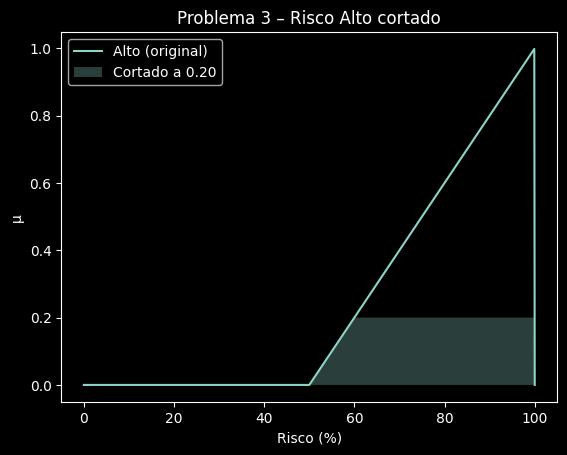

In [10]:

Risk = np.linspace(0, 100, 1001)
mu_alto = trimf(Risk, 50, 100, 100)
alto_cortado = np.minimum(mu_alto, firing)

plt.figure()
plt.plot(Risk, mu_alto, label="Alto (original)")
plt.fill_between(Risk, 0, alto_cortado, alpha=0.3, label=f"Cortado a {firing:.2f}")
plt.title("Problema 3 – Risco Alto cortado")
plt.xlabel("Risco (%)")
plt.ylabel("μ")
plt.legend()
plt.show()


# Problema 4 – Garrafa d’água

## 1) Fuzzifique 0.4 L

In [15]:
def trimf(x, a, b, c):
    x = np.asarray(x, dtype=float)
    left  = (x - a) / (b - a + 1e-12)
    right = (c - x) / (c - b + 1e-12)
    return np.maximum(0.0, np.minimum(left, right))

# Universos
N = np.linspace(0, 1, 1001)  # nível em litros
mu_vazia = trimf(N, 0, 0, 0.7)
mu_cheia = trimf(N, 0.3, 1, 1)

nivel_in = 0.4
mu_Vazia = float(np.interp(nivel_in, N, mu_vazia))
mu_Cheia = float(np.interp(nivel_in, N, mu_cheia))

print(f"μ_Vazia({nivel_in} L) = {mu_Vazia:.4f}")
print(f"μ_Cheia({nivel_in} L) = {mu_Cheia:.4f}")


μ_Vazia(0.4 L) = 0.4286
μ_Cheia(0.4 L) = 0.1429


## 2) Determine a saída agregada

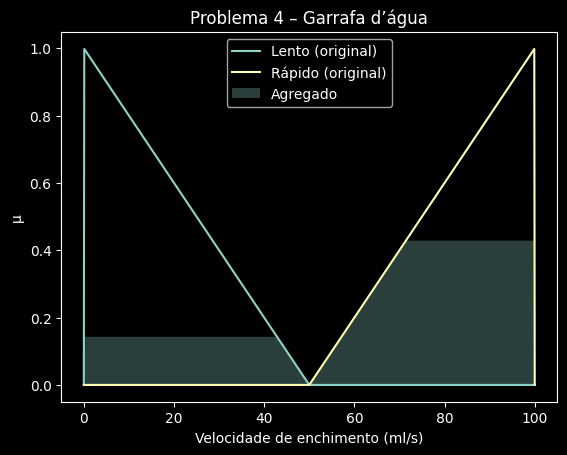

In [ ]:
S = np.linspace(0, 100, 1001)
mu_rapido = trimf(S, 50, 100, 100)
mu_lento  = trimf(S, 0, 0, 50)

rule1 = np.minimum(mu_Vazia, mu_rapido)  
rule2 = np.minimum(mu_Cheia, mu_lento)   

agg = np.maximum(rule1, rule2)

plt.figure()
plt.plot(S, mu_lento,  label="Lento (original)")
plt.plot(S, mu_rapido, label="Rápido (original)")
plt.fill_between(S, 0, agg, alpha=0.3, label="Agregado")
plt.title("Problema 4 – Garrafa d’água")
plt.xlabel("Velocidade de enchimento (ml/s)")
plt.ylabel("μ")
plt.legend()
plt.show()


### 3) Discussão, por que neste caso o resultado é uma combinação de Rápido e Lento?

Como o nível 0.4 L pertence  aos dois conjuntos, lento e rápido, as duas regras disparam quase ao mesmo tempo.  
Assim, a saída final é uma combinação fuzzy de enchimento rápido e enchimento lento simultaneamente. 
